In [71]:
import jinwu
from jinwu.core.time import Time
from jinwu import readfits, netdata
from pathlib import Path
import numpy as np

In [72]:
srclcpath = Path('/home/xinxiang/research/ep250615a/ep/ep11900273154wxt37s1.lc')
bkglcpath = Path('/home/xinxiang/research/ep250615a/ep/ep11900273154wxt37s1bk.lc')
batlcpath = Path('/home/xinxiang/research/ep250615a/01324646000/bat/event/ep250615a.lc')

In [73]:
bkglc = readfits(bkglcpath)
srclc = readfits(srclcpath)
batlc = readfits(batlcpath)

In [74]:
wxtlc = netdata(source=srclc, background=bkglc, label='wxt')

In [75]:
wxtlc.data.meta.timezero

172189118.3999

In [76]:
wxtlc.area_ratio

In [77]:
import matplotlib.pyplot as plt

In [78]:
wxttimezero = srclc.meta.timezero

In [79]:
trigtime = batlc.header['TRIGTIME']

In [80]:
trigtime = Time(trigtime,format='swift')
wxttimezero = Time(wxttimezero,format='ep')

In [81]:
battime = batlc.time - trigtime.swift

In [82]:
batrate = batlc.rate
baterror = batlc.error
batxerr = batlc.dt/2

In [83]:
# 假设 batrate, baterror 形状为 (N, 4)
if batrate.ndim == 2 and batrate.shape[1] == 4:
    batrate_sum = batrate.sum(axis=1)
    baterror_sum = np.sqrt((baterror ** 2).sum(axis=1))
else:
    batrate_sum = batrate
    baterror_sum = baterror

In [ ]:
batrate_sum = batrate_sum.tolist()
baterror_sum = baterror_sum.tolist()

In [85]:
wxttime = wxtlc.data.time + (wxttimezero - trigtime).sec

In [86]:
wxttime = wxttime.tolist()

In [87]:
wxtrate = wxtlc.data.rate.tolist()
wxterror = wxtlc.data.error.tolist()
wxtxerr = wxtlc.data.dt / 2

In [88]:
batt90start = Time('2025-06-15T22:25:16.206', scale='utc')
batt90stop = Time('2025-06-15T22:26:06.866', scale='utc')

t90left = (batt90start - trigtime).sec
t90right = (batt90stop - trigtime).sec

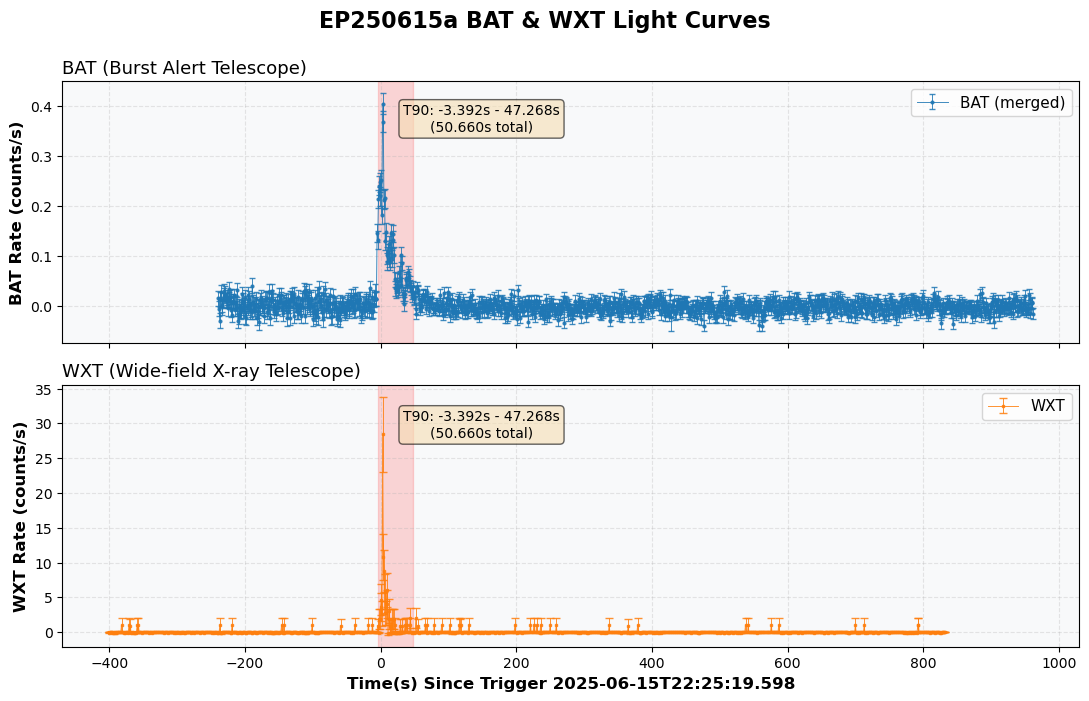

In [95]:
fig, axs = plt.subplots(2, 1, figsize=(11, 7), sharex=True)
fig.suptitle('EP250615a BAT & WXT Light Curves', fontsize=16, fontweight='bold', y=0.995)

# Calculate T90 duration
t90_duration = t90right - t90left
t90_label = f'T90: {t90left:.3f}s - {t90right:.3f}s\n({t90_duration:.3f}s total)'

# BAT light curve
axs[0].errorbar(battime, batrate_sum, yerr=baterror_sum, fmt='o-', color='#1f77b4', 
                capsize=2, elinewidth=0.7, linewidth=0.7, markersize=2, label='BAT (merged)', alpha=0.85)
axs[0].set_ylabel('BAT Rate (counts/s)', fontsize=12, fontweight='bold')
axs[0].set_title('BAT (Burst Alert Telescope)', fontsize=13, loc='left')
axs[0].grid(True, alpha=0.3, linestyle='--')
axs[0].legend(fontsize=11, loc='upper right')
axs[0].set_facecolor('#f8f9fa')
# Add T90 shaded region with label
axs[0].axvspan(t90left, t90right, alpha=0.15, color='red')
label_x = t90left + (t90right - t90left) *3
axs[0].text(label_x, axs[0].get_ylim()[1] * 0.9, t90_label, 
            ha='center', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))

# WXT light curve
axs[1].errorbar(wxttime, wxtrate, yerr=wxterror, fmt='s-', color='#ff7f0e', 
                capsize=3, elinewidth=0.7, linewidth=0.7, markersize=2, label='WXT', alpha=0.85)
axs[1].set_xlabel(f'Time(s) Since Trigger {trigtime.utc.isot}', fontsize=12, fontweight='bold')
axs[1].set_ylabel('WXT Rate (counts/s)', fontsize=12, fontweight='bold')
axs[1].set_title('WXT (Wide-field X-ray Telescope)', fontsize=13, loc='left')
axs[1].grid(True, alpha=0.3, linestyle='--')
axs[1].legend(fontsize=11, loc='upper right')
axs[1].set_facecolor('#f8f9fa')
# Add T90 shaded region with label
axs[1].axvspan(t90left, t90right, alpha=0.15, color='red')
axs[1].text(label_x, axs[1].get_ylim()[1] * 0.9, t90_label, 
            ha='center', va='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.6))
plt.savefig('/home/xinxiang/research/ep250615a/ep250615a_lightcurves.png', dpi=300)
plt.savefig('/home/xinxiang/research/ep250615a/ep250615a_lightcurves.svg', dpi=300)
plt.tight_layout()

In [96]:
t90left

np.float64(-3.3924560251151092)

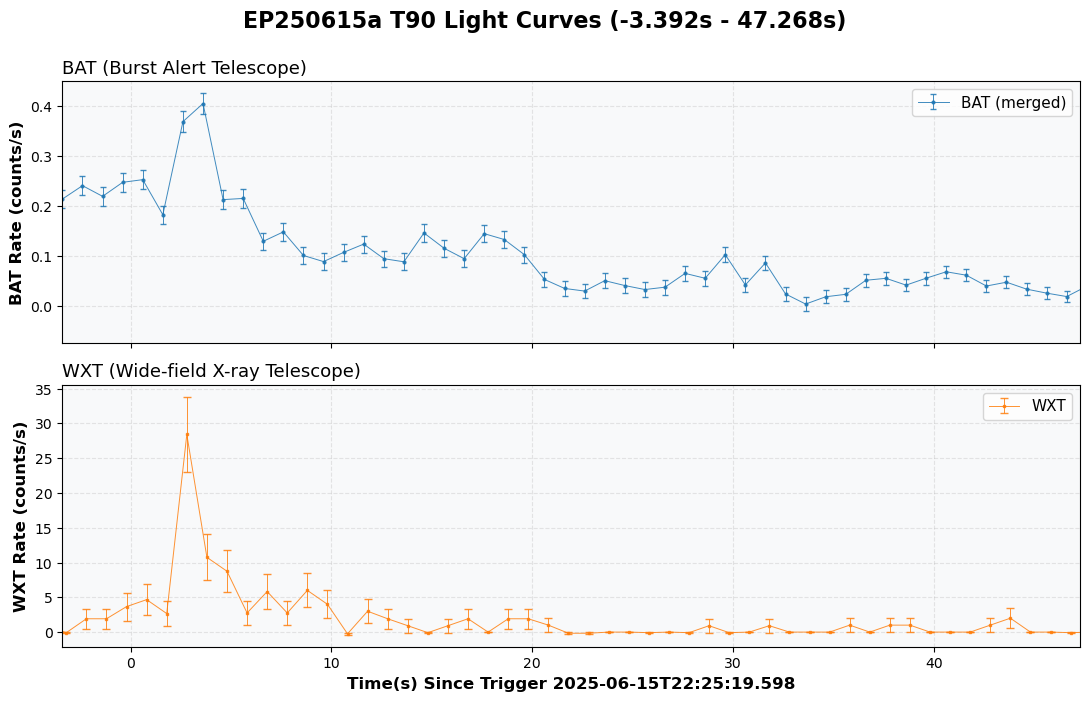

In [97]:
fig, axs = plt.subplots(2, 1, figsize=(11, 7), sharex=True)
fig.suptitle(f'EP250615a T90 Light Curves ({t90left:.3f}s - {t90right:.3f}s)', fontsize=16, fontweight='bold', y=0.995)

# BAT light curve
axs[0].errorbar(battime, batrate_sum, yerr=baterror_sum, fmt='o-', color='#1f77b4', 
                capsize=2, elinewidth=0.7, linewidth=0.7, markersize=2, label='BAT (merged)', alpha=0.85)
axs[0].set_ylabel('BAT Rate (counts/s)', fontsize=12, fontweight='bold')
axs[0].set_title('BAT (Burst Alert Telescope)', fontsize=13, loc='left')
axs[0].grid(True, alpha=0.3, linestyle='--')
axs[0].legend(fontsize=11, loc='upper right')
axs[0].set_facecolor('#f8f9fa')
# Add T90 shaded region
# axs[0].axvspan(t90left, t90right, alpha=0.15, color='red', label='T90')

# WXT light curve
axs[1].errorbar(wxttime, wxtrate, yerr=wxterror, fmt='s-', color='#ff7f0e', 
                capsize=3, elinewidth=0.7, linewidth=0.7, markersize=2, label='WXT', alpha=0.85)
axs[1].set_xlabel(f'Time(s) Since Trigger {trigtime.utc.isot}', fontsize=12, fontweight='bold')
axs[1].set_ylabel('WXT Rate (counts/s)', fontsize=12, fontweight='bold')
axs[1].set_title('WXT (Wide-field X-ray Telescope)', fontsize=13, loc='left')
axs[1].grid(True, alpha=0.3, linestyle='--')
axs[1].legend(fontsize=11, loc='upper right')
axs[1].set_facecolor('#f8f9fa')
# Add T90 shaded region
# axs[1].axvspan(t90left, t90right, alpha=0.15, color='red', label='T90')

# Set x-axis limits to T90 range
for ax in axs:
    ax.set_xlim(t90left, t90right)
plt.savefig('/home/xinxiang/research/ep250615a/ep250615a_t90_lightcurves.png', dpi=300)
plt.savefig('/home/xinxiang/research/ep250615a/ep250615a_t90_lightcurves.svg', dpi=300)
plt.tight_layout()

In [ ]:
from batanalysis.batobservation import BatObservation